# Bert-score/XLNet
> XL-Net models

[XL-Net](https://proceedings.neurips.cc/paper/2019/hash/dc6a7e655d7e5840e66733e9ee67cc69-Abstract.html) is based on AR (autoregressive) instead of AE (autoencoder) in BERT. AR model use the rest context in sentence to pridect the next word. However, AR model only takes information from forward or backward direction at a time and AE takes both at the same time. Both AR and AE have their advantages and disadvantages.

To solve this problem, XL-Net was proposed to avoid the downsides of using masks in training. It uses the maximum log likelihood of the whole sequence's full permutations of the factorization order, also known as Permutations Language Model(PLM). In this way, XL-Net can use the forward and backward information at the same time. Also, in the pre-training phase, a modified approach used in Transformer-XL was used to improve the performance related to long-text sequence. Another feature XLNet has is Two-Stream Self-Attention. XLNet disrupts the order of sentences using PLM. Therefore, location information of tokens is very important in the prediction, and the content information of tokens must be hidden (otherwise, the input contains the content information to be predicted). That is, XLNet needs to see the location of the token, but not the content of the token. For this purpose, each input information are separated into Query Stream and Content Stream. Query Stream is used for prediction and contains only location information for the current location. The Content Stream holds the token's Content.

<center><img src="xlnet.png" width="30%"></center>

In real task implementation, XL-Net should have a better [performance](https://github.com/zihangdai/xlnet) than the original BERT on many tasks and datasets.

**This notebook presented model evaluation process using [Bert-score](https://github.com/Tiiiger/bert_score) of xlnet-base-cased and xlnet-large-cased models on WMT18 news commentary dataset.**

*Ming He*

*ID: 32668899*

*mh9n21@soton.ac.uk*

In [1]:
import bert_score
from bert_score import score
import numpy as np

In [3]:
# Download the necessary package from bert-score reporistry 
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 874, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 874 (delta 136), reused 222 (delta 127), pack-reused 638
Receiving objects: 100% (874/874), 1.32 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (451/451), done.


In [4]:
# Read the text dataset of different language
with open("training-monolingual-nc-v13/news-commentary-v13.cs") as f:
    cs = [line.strip() for line in f]

with open("training-monolingual-nc-v13/news-commentary-v13.de") as f:
    de = [line.strip() for line in f]

with open("training-monolingual-nc-v13/news-commentary-v13.en") as f:
    en = [line.strip() for line in f]

with open("training-monolingual-nc-v13/news-commentary-v13.ru") as f:
    ru = [line.strip() for line in f]

with open("training-monolingual-nc-v13/news-commentary-v13.zh") as f:
    zh = [line.strip() for line in f]

In [3]:
# selected the first 15000 data points for model evaluation
idx = 15000
cs = cs[:idx]
de = de[:idx]
en = en[:idx]
ru = ru[:idx]
zh = zh[:idx]

Now, we can start our model evaluation

In [5]:
for cands in [cs]:
    P_b, R_b, F1_b = score(cands, en, model_type='xlnet-base-cased', verbose=True)
    print('cs, base, P: {}'.format(P_b.numpy().mean()))
    print('cs, base, R: {}'.format(R_b.numpy().mean()))
    print('cs, base, F1: {}'.format(F1_b.numpy().mean()))
    P_l, R_l, F1_l = score(cands, en, model_type='xlnet-large-cased', verbose=True)
    print('cs, large, P: {}'.format(P_l.numpy().mean()))
    print('cs, large, R: {}'.format(R_l.numpy().mean()))
    print('cs, large, F1: {}'.format(F1_l.numpy().mean()))

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 911.78 seconds, 5.48 sentences/sec
cs, base, P: 0.2808099389076233
cs, base, R: 0.3304557502269745
cs, base, F1: 0.3010055124759674


Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 2188.28 seconds, 2.28 sentences/sec
cs, large, P: 0.23985524475574493
cs, large, R: 0.3036036193370819
cs, large, F1: 0.26670321822166443


In [ ]:
for cands in [de]:
    P_b, R_b, F1_b = score(cands, en, model_type='xlnet-base-cased', verbose=True)
    print('de, base, P: {}'.format(P_b.numpy().mean()))
    print('de, base, R: {}'.format(R_b.numpy().mean()))
    print('de, base, F1: {}'.format(F1_b.numpy().mean()))
    P_l, R_l, F1_l = score(cands, en, model_type='xlnet-large-cased', verbose=True)
    print('de, large, P: {}'.format(P_l.numpy().mean()))
    print('de, large, R: {}'.format(R_l.numpy().mean()))
    print('de, large, F1: {}'.format(F1_l.numpy().mean()))

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 955.24 seconds, 5.23 sentences/sec
de, base, P: 0.2752642035484314
de, base, R: 0.33763718605041504
de, base, F1: 0.3009224236011505


Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 2427.24 seconds, 2.06 sentences/sec
de, large, P: 0.23427626490592957
de, large, R: 0.3048333525657654
de, large, F1: 0.2636149525642395


In [ ]:
for cands in [ru]:
    P_b, R_b, F1_b = score(cands, en, model_type='xlnet-base-cased', verbose=True)
    print('ru, base, P: {}'.format(P_b.numpy().mean()))
    print('ru, base, R: {}'.format(R_b.numpy().mean()))
    print('ru, base, F1: {}'.format(F1_b.numpy().mean()))
    P_l, R_l, F1_l = score(cands, en, model_type='xlnet-large-cased', verbose=True)
    print('ru, large, P: {}'.format(P_l.numpy().mean()))
    print('ru, large, R: {}'.format(R_l.numpy().mean()))
    print('ru, large, F1: {}'.format(F1_l.numpy().mean()))

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/156 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 2221.19 seconds, 2.25 sentences/sec
ru, base, P: 0.24080991744995117
ru, base, R: 0.3330230116844177
ru, base, F1: 0.2767030894756317


Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/156 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 4772.36 seconds, 1.05 sentences/sec
ru, large, P: 0.22511693835258484
ru, large, R: 0.2818000018596649
ru, large, F1: 0.24892178177833557


In [ ]:
for cands in [zh]:
    P_b, R_b, F1_b = score(cands, en, model_type='xlnet-base-cased', verbose=True)
    print('zh, base, P: {}'.format(P_b.numpy().mean()))
    print('zh, base, R: {}'.format(R_b.numpy().mean()))
    print('zh, base, F1: {}'.format(F1_b.numpy().mean()))
    P_l, R_l, F1_l = score(cands, en, model_type='xlnet-large-cased', verbose=True)
    print('zh, large, P: {}'.format(P_l.numpy().mean()))
    print('zh, large, R: {}'.format(R_l.numpy().mean()))
    print('zh, large, F1: {}'.format(F1_l.numpy().mean()))

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 301.99 seconds, 16.56 sentences/sec
zh, base, P: 0.31784990429878235
zh, base, R: 0.2387894093990326
zh, base, F1: 0.2695487439632416


Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


0%|          | 0/157 [00:00<?, ?it/s]

computing greedy matching.


0%|          | 0/79 [00:00<?, ?it/s]

done in 715.80 seconds, 6.99 sentences/sec
zh, large, P: 0.21494169533252716
zh, large, R: 0.1513984054327011
zh, large, F1: 0.17627935111522675


In [7]:
from bert_score import plot_example

In [5]:
for cands in [cs, de, en, ru, zh]:
    print(cands[20000])

Vzestup islámského fundamentalismu představuje další historickou výzvu, byť mnohem méně vyzrálou než ty, jimž USA čelily v minulosti.
Ein Leitfaden für den Pandemie-Fall
But are the results of the parliamentary elections due this coming January truly a foregone conclusion?
Внутри руководящей коммунистической партии Вьетнама существует большое расхождение во мнениях по поводу отношений с США.
对诸多相关药物种类来讲，往往有不同制药企业生产的若干种药物具有相似的功效和安全性。


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


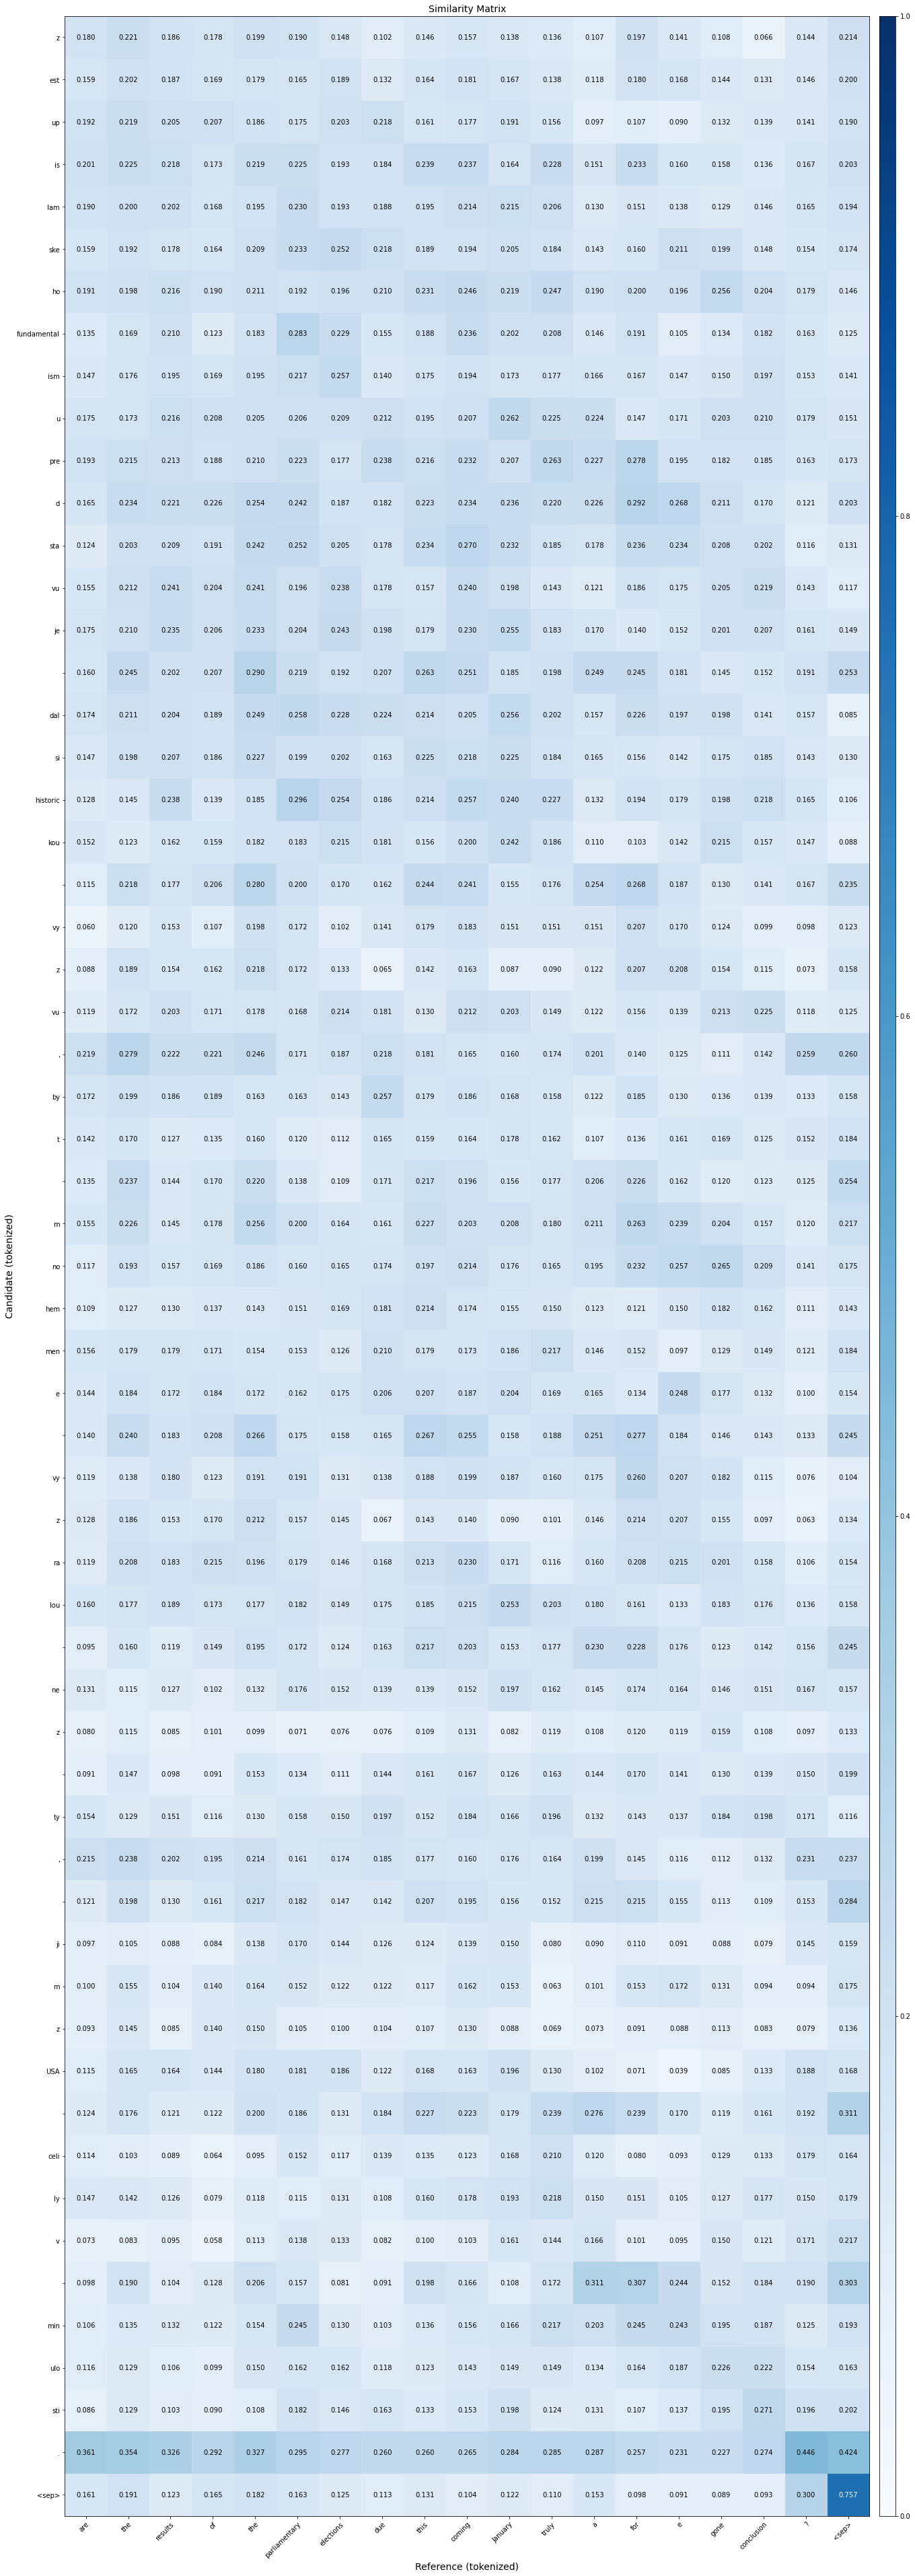

In [10]:
# plot an example of the similarity matrix
plot_example(cs[20000], en[20000], lang='en', model_type='xlnet-base-cased')